In [113]:
#Pandas es utilizado para leer los set de datos
import pandas as pd
#Numpy es utilizado para generar las series de datos a graficar
import numpy as np
#Seaborn es utilizado para generar los gráficos
import seaborn as sns
import matplotlib.pyplot as plt
#Se importan modulos estadisticos para generar test de hipotesis, entre otros
from sklearn.preprocessing import StandardScaler
#Módulos implementa funciones que evalúan el error de predicción para propósitos específicos
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
#Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

#Dividir arreglos o matrices en subconjuntos aleatorios de tren y prueba
from sklearn.model_selection import train_test_split

# import the model
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin, space_eval
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, TimeSeriesSplit
import time,os
import joblib


from sklearn.metrics import mean_squared_error, mean_absolute_error

In [114]:
# Carga tus datos aquí
df = pd.read_excel('C:/Users/Asus/Escritorio/Universidad/Nivel 12/TESIS/series_tiempo.xlsx')
df

,mesindexacion,mesindexacion2,añoindexacion,licitacion,generadora,tipobloque,bloque,decpnudo,tipodecreto,mesreferencia,...,indice_CARBÓN,indice_CARBÓN_6M,indice_CPI,indice_CPI_4M,indice_CPI_6M,indice_CPI_9M,indice_GNL,indice_GNL_4M,indice_GNL_6M,unique_id
0,2010-01-01,1,2010,CGED 2008/01,CAMPANARIO,BB,BS1,130/2008,Decreto PN,1,...,0,0,0,0,0,1,0,0,0,ID_CGED 2008/01_CAMPANARIO_BS1_BB
1,2010-01-01,1,2010,CGED 2008/01,CAMPANARIO,BV,BS1,130/2008,Decreto PN,1,...,0,0,0,0,0,1,0,0,0,ID_CGED 2008/01_CAMPANARIO_BS1_BV
2,2010-01-01,1,2010,CGED 2008/01,COLBÚN,BB,BS1,130/2008,Decreto PN,1,...,0,0,0,0,0,1,0,0,0,ID_CGED 2008/01_COLBÚN_BS1_BB
3,2010-01-01,1,2010,CGED 2008/01,COLBÚN,BV,BS1,130/2008,Decreto PN,1,...,0,0,0,0,0,1,0,0,0,ID_CGED 2008/01_COLBÚN_BS1_BV
4,2010-01-01,1,2010,CGED 2008/01,ENDESA,BB,BS2,130/2008,Decreto PN,1,...,0,0,0,0,0,1,0,0,0,ID_CGED 2008/01_ENDESA_BS2_BB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16090,2022-12-01,12,2022,SIC 2013/03_2 (ENELSA),SAN JUAN SPA.,BB,BS2A,4T/2013,Decreto PN,12,...,0,0,0,0,1,0,0,0,0,ID_SIC 2013/03_2 (ENELSA)_SAN JUAN SPA._BS2A_BB
16091,2022-12-01,12,2022,SIC 2013/03_2 (ENELSA),SAN JUAN SPA.,BB,BS2C,4T/2013,Decreto PN,12,...,0,0,0,0,1,0,0,0,0,ID_SIC 2013/03_2 (ENELSA)_SAN JUAN SPA._BS2C_BB
16092,2022-12-01,12,2022,SIC 2013/03_2 (ENELSA),SAN JUAN SPA.,BB,BS3,4T/2013,Decreto PN,12,...,0,0,0,0,1,0,0,0,0,ID_SIC 2013/03_2 (ENELSA)_SAN JUAN SPA._BS3_BB
16093,2022-12-01,12,2022,SIC 2013/03_2 (ENELSA),SANTIAGO SOLAR S.A.,BB,BS2B,4T/2013,Decreto PN,12,...,0,0,0,0,1,0,0,0,0,ID_SIC 2013/03_2 (ENELSA)_SANTIAGO SOLAR S.A._...


In [115]:
df = df[df['unique_id'] == 'ID_2015/01_BESALCO_BS2C_BB']

In [116]:
# Lista de nombres de las variables que quieres eliminar
variables_a_eliminar = ['licitacion',
       'generadora', 'tipobloque', 'bloque', 'decpnudo', 'tipodecreto',
       'mesreferencia', 'ptooferta', 'valorbase',
       'precioenergiabase',
       'añoreferencia', 'añobase', 'mesbase', 'rezago_2.0',
       'rezago_3.0', 'indice_BRENT_6M', 'indice_CARBÓN', 'indice_CARBÓN_6M',
       'indice_CPI', 'indice_CPI_4M', 'indice_CPI_6M', 'indice_CPI_9M',
       'indice_GNL', 'indice_GNL_4M', 'indice_GNL_6M','unique_id']

In [117]:
df.drop(variables_a_eliminar, axis=1, inplace=True)
df

,mesindexacion,mesindexacion2,añoindexacion,precioindexadoponderado,valoractual,factorindexacion,añoactual,mesactual
11460,2021-01-01,1,2021,77.406071,258.980,1.090226,2020,10
11648,2021-02-01,2,2021,77.597061,259.619,1.092916,2020,11
11836,2021-03-01,3,2021,77.730365,260.065,1.094794,2020,12
12024,2021-04-01,4,2021,77.854105,260.479,1.096537,2021,1
12212,2021-05-01,5,2021,78.008331,260.995,1.098709,2021,2
12400,2021-06-01,6,2021,78.237279,261.761,1.101934,2021,3
12588,2021-07-01,7,2021,78.569344,262.872,1.106610,2021,4
12778,2021-08-01,8,2021,79.015883,264.366,1.112900,2021,5
12968,2021-09-01,9,2021,79.574804,266.236,1.120772,2021,6
13158,2021-10-01,10,2021,80.143887,268.140,1.128787,2021,7


In [118]:
df=df.drop(['mesindexacion2', 'añoindexacion', 'añoactual','mesactual'], axis=1)
df

,mesindexacion,precioindexadoponderado,valoractual,factorindexacion
11460,2021-01-01,77.406071,258.980,1.090226
11648,2021-02-01,77.597061,259.619,1.092916
11836,2021-03-01,77.730365,260.065,1.094794
12024,2021-04-01,77.854105,260.479,1.096537
12212,2021-05-01,78.008331,260.995,1.098709
12400,2021-06-01,78.237279,261.761,1.101934
12588,2021-07-01,78.569344,262.872,1.106610
12778,2021-08-01,79.015883,264.366,1.112900
12968,2021-09-01,79.574804,266.236,1.120772
13158,2021-10-01,80.143887,268.140,1.128787


In [119]:
df.set_index('mesindexacion', inplace=True)
df

,precioindexadoponderado,valoractual,factorindexacion
mesindexacion,,,
2021-01-01,77.406071,258.980,1.090226
2021-02-01,77.597061,259.619,1.092916
2021-03-01,77.730365,260.065,1.094794
2021-04-01,77.854105,260.479,1.096537
2021-05-01,78.008331,260.995,1.098709
2021-06-01,78.237279,261.761,1.101934
2021-07-01,78.569344,262.872,1.106610
2021-08-01,79.015883,264.366,1.112900
2021-09-01,79.574804,266.236,1.120772


In [120]:
# Dividir los datos en características (X) y la variable objetivo (y)

X = df[['valoractual', 'factorindexacion']]
y = df['precioindexadoponderado']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
# Calcular la matriz de correlación de Pearson

corr_matrix = X.corr().abs()

# Filtrar las correlaciones mayores a 0.75
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

print("Correlación de Pearson:\nLas siguientes características están altamente correlacionadas (>0.75):", to_drop, "\n")

Correlación de Pearson:
Las siguientes características están altamente correlacionadas (>0.75): ['factorindexacion'] 



In [122]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestRegressor
# 4. Importancia de la Característica del Árbol de Decisión
model = RandomForestRegressor()
model.fit(X, y)
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
print("Importancia de la Característica del Árbol de Decisión:\n", feature_importance.nlargest(4, 'Importance'), "\n")

Importancia de la Característica del Árbol de Decisión:
             Feature  Importance
0       valoractual    0.541859
1  factorindexacion    0.458141 



In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Seleccion de caracteristicas
features =df.columns

#Se define escalado
std_scaler = StandardScaler()
min_scaler=MinMaxScaler()

#Transformacion

for i in features:
  df[i] = min_scaler.fit_transform(df[i].values.reshape(-1,1))

df.head()

,precioindexadoponderado,valoractual,factorindexacion
mesindexacion,,,
2021-01-01,0.000000,0.000000,0.000000
2021-02-01,0.017992,0.017992,0.017992
2021-03-01,0.030550,0.030550,0.030550
2021-04-01,0.042208,0.042208,0.042208
2021-05-01,0.056737,0.056737,0.056737


In [124]:
features = ['valoractual', 'factorindexacion']

In [125]:
#Se define escalado
std_scaler = StandardScaler()

series_time_scaled=[]

In [126]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


Después de la estandarización:
               valoractual  factorindexacion
mesindexacion                               
2021-01-01       -1.280116          0.000000
2021-02-01       -1.223135          0.017992
2021-03-01       -1.183364          0.030550
2021-04-01       -1.146447          0.042208
2021-05-01       -1.100434          0.056737
2021-06-01       -1.032128          0.078305
2021-07-01       -0.933057          0.109587
2021-08-01       -0.799833          0.151654
2021-09-01       -0.633080          0.204308
2021-10-01       -0.463296          0.257919
2021-11-01       -0.306441          0.307448
2021-12-01       -0.166262          0.351711
2022-01-01       -0.024567          0.396452
2022-02-01        0.105536          0.437533
2022-03-01        0.211116          0.470871
2022-04-01        0.332212          0.509109
2022-05-01        0.483003          0.556723
2022-06-01        0.679093          0.618640
2022-07-01        0.865197          0.677404
2022-08-01        1.078

100%|██████████| 100/100 [00:02<00:00, 34.61trial/s, best loss: 0.00026619022468140594]
Los mejores hiperparámetros son:  {'C': 0.8631569322182825, 'epsilon': 0.010207135533262553, 'gamma': 0, 'kernel': 3}
MAE: 0.01
MAPE: 1.56%
MSE: 0.00026619
El código se ejecutó en 0.048468108971913657 minutos


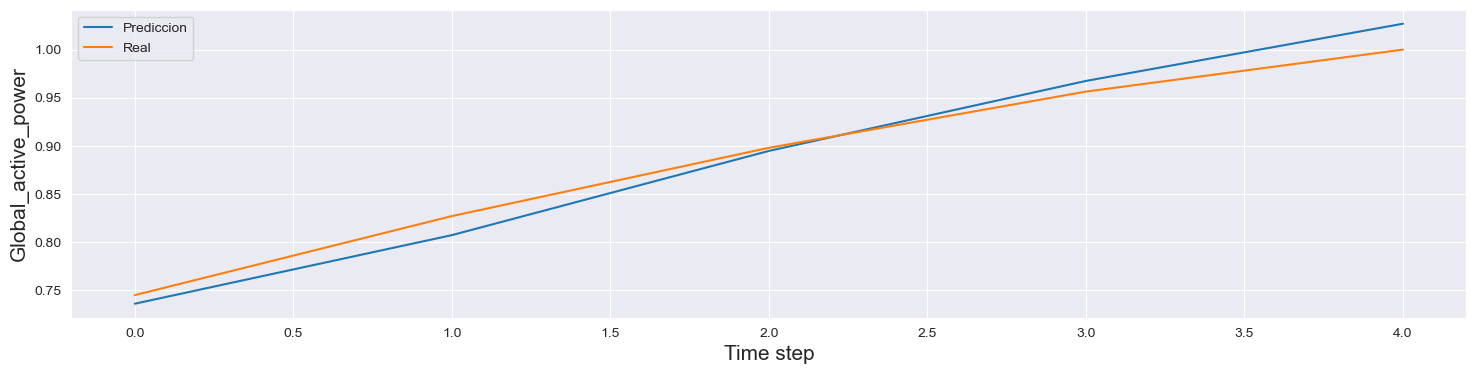

In [127]:
# Crear una instancia de StandardScaler
std_scaler = StandardScaler()

    
    # Iterar a través de cada característica en la lista 'features'
for nombre_caracteristica in features:
        # Extraer los valores de la característica actual y darle forma a (-1, 1)
    valores_caracteristica = df[nombre_caracteristica].values.reshape(-1, 1)
        
        # Aplicar la estandarización a los valores de la característica
    valores_estandarizados = std_scaler.fit_transform(valores_caracteristica)
        
        # Reemplazar los valores originales de la característica con los valores estandarizados en la serie
    df[nombre_caracteristica] = valores_estandarizados
    
    print(f"\nDespués de la estandarización:\n{df[features]}")

# Crear una nueva lista para almacenar las series estandarizadas
series_time_scaled.append(df)
series_time_scaled


# Supongamos que 'series_time_scaled' es tu lista que contiene un solo DataFrame
data_frame_individual = series_time_scaled[0]

# Convertir el DataFrame a un nuevo DataFrame
df2 = pd.DataFrame(data_frame_individual)



def time_delay_embedding(series: pd.Series, n_lags: int, horizon: int):
    """
    Incrustación de retardo de tiempo
    :param series: serie de tiempo como objeto de pandas
    :param n_lags: número de valores pasados para usar como variables explicativas
    :param horizon: horizonte de pronostico
    :return:pd.DataFrame con series temporales reconstruidas
    """
    assert isinstance(series, pd.Series)

    if series.name is None:
        name = 'Series'
    else:
        name = series.name

    n_lags_iter = list(range(n_lags, -horizon, -1))

    serie_time_delay = [series.shift(i) for i in n_lags_iter]
    serie_time_delay = pd.concat(serie_time_delay, axis=1).dropna()
    serie_time_delay.columns = [f'{name}(t-{j - 1})'
                 if j > 0 else f'{name}(t+{np.abs(j) + 1})'
                 for j in n_lags_iter]

    return serie_time_delay


series_predic=[]
series_target=[]
serie_split = []
for columna in df2:
  col_df = time_delay_embedding(
      df2[columna], #Serie de tiempo
      n_lags=2, #Numero de retrasos
      horizon=1 # Horizonte de prediccion
      )
  serie_split.append(col_df)

serie_df = pd.concat(serie_split, axis=1).dropna()
serie_df.head()

predictor_variables = serie_df.columns.str.contains('valoractual','factorindexacion')
target_variables = serie_df.columns.str.contains('precioindexadoponderado\(t\+')
series_predic.append(predictor_variables)
series_target.append(target_variables)

serie_df = pd.concat(serie_split, axis=1).dropna()
serie_df.head()

predictor_variables = serie_df.columns.str.contains('\(t\-')
target_variables = serie_df.columns.str.contains('precioindexadoponderado\(t\+')

train_supervised = serie_df.iloc[:, predictor_variables]
test_supervised = serie_df.iloc[:, target_variables]

#Se separa conjunto en entrenamiento y prueba; sin aleatoriedad
#Dejando un %30 de la data para test
X_train, X_test, Y_train, Y_test = train_test_split(train_supervised, test_supervised, test_size=0.2, shuffle=False)

shape=len(X_train.columns)

print("Separacion de datos terminada!")

shape_x_test=X_test.shape
shape_y_test=Y_test.shape


#Se establece porcentaje de usado para test
PORCENTAJE_TEST=0.2

#Se define la cantidad de intentos de la optimizacion bayesiana
INTENTOS=100

# Marca el tiempo de inicio
inicio = time.time()
def objective(params):

    # Definir los hiperparámetros a optimizar
    kernel = params['kernel']
    gamma = params['gamma']
    C = float(params['C'])
    epsilon  = float(params['epsilon'])

    tscv = TimeSeriesSplit(n_splits=5)

    scores_mse = []
    scores_rmse = []
    scores_mae= []
    scores_mape= []
    times=[]
    aux=1000

    #Validacion cruzada
    for train_index, test_index in tscv.split(X_train):
      X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
      y_train_, y_test_ = Y_train.iloc[train_index], Y_train.iloc[test_index]

      model_SVR = SVR(kernel = kernel, gamma =gamma, C =C, epsilon =epsilon )

      #Entrenamiento
      start = time.time()
      model_SVR.fit(X_train_, y_train_)
      end = time.time()

      #Evaluacion del modelo
      y_pred = model_SVR.predict(X_test)
      score_mse = mse(Y_test, y_pred)
      rmse = np.sqrt(score_mse)  # Calcular el RMSE
      score_mae = mae(Y_test, y_pred)
      score_mape= mape(Y_test, y_pred)

      scores_mse.append(score_mse)
      scores_mae.append(score_mae)
      scores_mape.append(score_mape)
      scores_rmse.append(rmse)

      if(score_mse<aux):
        aux=score_mse
        best_model=model_SVR

      #Tiempo de la validadion cruzada
      time_val= end- start
      times.append(time_val)

    return {'loss': np.mean(score_mse),
            'status': STATUS_OK,
            'model': model_SVR,
            'params': params,
            'time':times,
            'scores_mse': scores_mse,
            'scores_mae': scores_mae,
            'scores_mape': scores_mape,
            'scores_rmse': scores_rmse
            }

# Definir el espacio de búsqueda de hiperparámetros
space = {
    'kernel':hp.choice('kernel',['poly', 'rbf', 'sigmoid', 'linear']),
    'gamma': hp.choice('gamma', ['scale', 'auto'],),
    'C': hp.uniform('C', 0.01, 1),
    'epsilon': hp.uniform('epsilon', 0.01, 0.9),
}

#Optimización bayesiana
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=INTENTOS, trials=trials)

print("Los mejores hiperparámetros son: ", best)

#Obtener el valor de la función objetivo del mejor ensayo
best_trial = trials.best_trial
best_model = best_trial['result']['model']

# Obtener una lista de los resultados de todas las evaluaciones
all_results = [trial['result'] for trial in trials]

# Mejores hiperparámetros encontrados
best_params = space_eval(space, best)
best_params

"""#3. Evaluacion de modelo"""

#Se realiza prediccion
results = best_model.predict(X_test)


#Grafico de prediccion con el valor real
tiempo=[x for x in range(Y_test.shape[0])]
plt.figure(figsize=(18,4))
plt.plot(tiempo,results)
plt.ylabel('Global_active_power', size=15)
plt.plot(tiempo,Y_test)
plt.xlabel('Time step', size=15)
plt.legend(['Prediccion','Real'])



#################AGREGUE ESTA PARTE##########################################
# Selecciona una columna específica de Y_test para comparar con results
columna_objetivo = 'precioindexadoponderado(t+1)'  # Reemplaza con el nombre real de tu columna objetivo
Y_test_columna = Y_test[columna_objetivo].values

# Cálculo del MAE
mae = mae(Y_test_columna, results)

# Cálculo del MAPE
mape_value = np.mean(np.abs((Y_test_columna - results) / Y_test_columna)) * 100
mse= mse(Y_test_columna,results)

print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape_value:.2f}%')
print(f'MSE: {mse:.8f}')
#############################################################################

'''# Calcular MAE, MSE y MAPE
mae_value = mean_absolute_error(Y_test, results)
mse_value = mean_squared_error(Y_test, results)
mape_value = mean_absolute_percentage_error(Y_test, results)

# Imprimir los resultados
print(f"MAE: {mae_value}")
print(f"MSE: {mse_value}")
print(f"MAPE: {mape_value}")'''

fin = time.time()
print(f"El código se ejecutó en {(fin - inicio)/60} minutos")


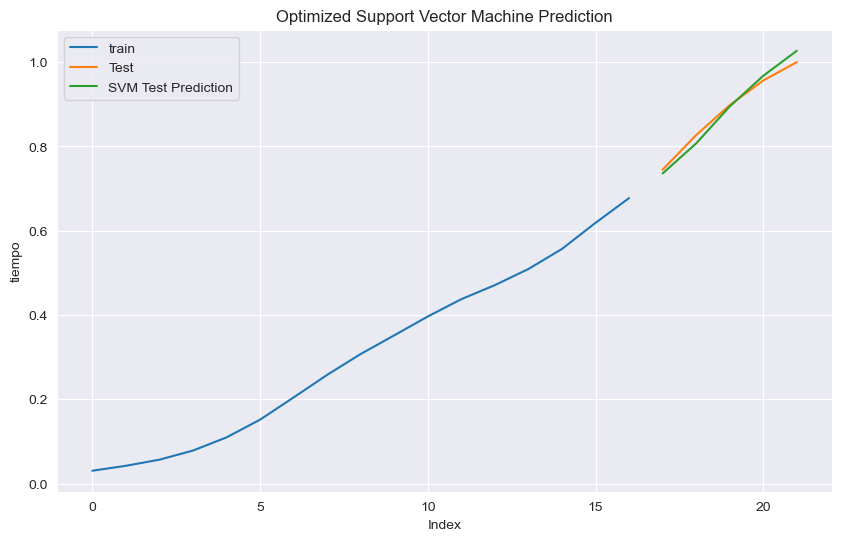

In [128]:
    # Graficar los resultados
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
train_original_range = range(len(Y_train))
test_range = range(len(Y_train), len(Y_train) + len(Y_test))
plt.plot(train_original_range, Y_train, label='train')
plt.plot(test_range, Y_test, label='Test')
plt.plot(test_range, results, label='SVM Test Prediction')
plt.title('Optimized Support Vector Machine Prediction')
plt.xlabel('Index')
plt.ylabel('Precio')
plt.legend()
plt.show()